<a href="https://colab.research.google.com/github/Tomer-TK/skills-introduction-to-github/blob/main/IntroToAI_TK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    silhouette_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
import pandas as pd

DATA_PATH = "/content/dataset.csv"
df = pd.read_csv(DATA_PATH)
print(df.columns.tolist())
df.head()

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df = df.sample(n=50000, random_state=42)

# Audio feature columns
audio_features = [
     "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

# Keep only rows where these columns are not null
df = df.dropna(subset=audio_features + ["track_genre"]).copy()

df[audio_features].describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,33.256920,2.282052e+05,0.565963,0.641456,-8.246604,0.084398,0.313464,0.155164,0.21352,0.473878,122.211438
std,22.283949,1.108710e+05,0.174015,0.251491,5.011987,0.105666,0.332277,0.308354,0.19040,0.259784,30.015696
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,17.000000,1.736992e+05,0.456000,0.472000,-10.034000,0.035800,0.016500,0.000000,0.09820,0.256750,99.290000
50%,35.000000,2.128000e+05,0.579000,0.685000,-6.990000,0.048700,0.167000,0.000046,0.13200,0.464000,122.037000
75%,50.000000,2.616138e+05,0.694000,0.853000,-5.002750,0.084400,0.594000,0.049000,0.27200,0.683000,140.109250
max,98.000000,5.237295e+06,0.985000,1.000000,1.795000,0.965000,0.996000,1.000000,1.00000,0.992000,243.372000


In [ ]:
def map_genre_main(genre_str):
    g = str(genre_str).lower()
    if "pop" in g:
        return "pop"
    if "hip hop" in g or "rap" in g:
        return "hiphop"
    if "rock" in g:
        return "rock"
    if "edm" in g or "dance" in g or "house" in g:
        return "edm"
    if "jazz" in g:
        return "jazz"
    if "classical" in g:
        return "classical"
    if "r&b" in g or "soul" in g:
        return "rnb_soul"
    # fallback
    return "other"

df["genre_main"] = df["track_genre"].apply(map_genre_main)

# Filter very rare genres to keep classification easier
valid_genres = df["genre_main"].value_counts()
valid_genres = valid_genres[valid_genres > 500].index  # threshold can be tuned
df = df[df["genre_main"].isin(valid_genres)].copy()
df["genre_main"].value_counts()


,count
genre_main,
other,37671
pop,3972
rock,3548
edm,3468


In [ ]:
def map_ambience(genre_main):
    if genre_main in ["jazz", "classical", "rnb_soul"]:
        return "cafe_chill"
    if genre_main in ["edm", "hiphop"]:
        return "gym_energetic"
    if genre_main in ["rock"]:
        return "lounge"
    if genre_main in ["pop"]:
        return "party"
    return "other"

df["ambience"] = df["genre_main"].apply(map_ambience)
df = df[df["ambience"] != "other"].copy()
df["ambience"].value_counts()


,count
ambience,
party,3972
lounge,3548
gym_energetic,3468


In [ ]:
X = df[audio_features].copy()
y_genre = df["genre_main"].astype(str).copy()
y_amb   = df["ambience"].astype(str).copy()

le_genre = LabelEncoder()
le_amb   = LabelEncoder()

y_genre_enc = le_genre.fit_transform(y_genre)
y_amb_enc   = le_amb.fit_transform(y_amb)

print("Genres (genre_main):", le_genre.classes_)
print("Ambiences:", le_amb.classes_)



Genres (genre_main): ['edm' 'pop' 'rock']
Ambiences: ['gym_energetic' 'lounge' 'party']


In [ ]:
X_train, X_temp, y_genre_train, y_genre_temp, y_amb_train, y_amb_temp = train_test_split(
    X, y_genre_enc, y_amb_enc,
    test_size=0.4,
    random_state=42,
    stratify=y_amb_enc
)

X_val, X_test, y_genre_val, y_genre_test, y_amb_val, y_amb_test = train_test_split(
    X_temp, y_genre_temp, y_amb_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_amb_temp
)

X_train.shape, X_val.shape, X_test.shape



((6592, 11), (2198, 11), (2198, 11))

In [ ]:
class FeatureDropout(BaseEstimator, TransformerMixin):
    def __init__(self, p=0.0, random_state=None):
        self.p = p
        self.random_state = random_state

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.p <= 0:
            return X
        rng = np.random.RandomState(self.random_state)
        mask = (rng.rand(*X.shape) >= self.p).astype(float)
        return X * mask

preprocess = Pipeline([
    ("scale", StandardScaler())
])



In [ ]:
def multiclass_roc_auc(y_true, proba, average="macro"):
    classes = np.unique(y_true)
    y_bin = label_binarize(y_true, classes=classes)
    return roc_auc_score(y_bin, proba, average=average, multi_class="ovr")


In [ ]:
def run_models_for_task(task_name, X_train, y_train, X_val, y_val, X_test, y_test, label_encoder):
    print(f"\n=== Task: {task_name} ===")

    models = {
        "LogReg": Pipeline([
            ("prep", preprocess),
            ("drop", FeatureDropout(p=0.0, random_state=42)),
            ("clf", LogisticRegression(
                max_iter=500,
                multi_class="multinomial",
                solver="lbfgs"
            ))
        ]),
        "SVM-RBF": Pipeline([
            ("prep", preprocess),
            ("drop", FeatureDropout(p=0.0, random_state=42)),
            ("clf", SVC(probability=True))
        ]),
        "MLP": Pipeline([
            ("prep", preprocess),
            ("drop", FeatureDropout(p=0.0, random_state=42)),
            ("clf", MLPClassifier(
                hidden_layer_sizes=(64, 32),
                activation="relu",
                early_stopping=True,
                max_iter=200,
                random_state=42
            ))
        ])
    }

    param_spaces = {
        "LogReg": {
            "drop__p": [0.0, 0.1, 0.2],
            "clf__C": np.logspace(-2, 2, 6)
        },
        "SVM-RBF": {
            "drop__p": [0.0, 0.1, 0.2],
            "clf__C": np.logspace(-1, 2, 6),
            "clf__gamma": np.logspace(-3, 0, 5),
            "clf__kernel": ["rbf"]
        },
        "MLP": {
            "drop__p": [0.0, 0.1, 0.2, 0.3],
            "clf__alpha": np.logspace(-5, -2, 4),
            "clf__hidden_layer_sizes": [(64, 32), (128, 64), (64,), (128, 64, 32)],
            "clf__learning_rate_init": [1e-3, 3e-3, 1e-4]
        }
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    best_model = None
    best_name = None
    best_val_auc = -np.inf

    for name, pipe in models.items():
        print(f"\n>>> {name}")
        rs = RandomizedSearchCV(
            pipe,
            param_distributions=param_spaces[name],
            n_iter=10,
            scoring="roc_auc_ovr",
            cv=cv,
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        rs.fit(X_train, y_train)

        proba_val = rs.predict_proba(X_val)
        val_auc = multiclass_roc_auc(y_val, proba_val)
        print(f"Validation AUC (macro): {val_auc:.3f}")

        results.append((name, rs.best_params_, val_auc))

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_name = name
            best_model = rs.best_estimator_

    print(f"\nBest model for {task_name}: {best_name} (val AUC={best_val_auc:.3f})")

    # Evaluate best on test
    proba_test = best_model.predict_proba(X_test)
    y_pred = best_model.predict(X_test)

    test_auc = multiclass_roc_auc(y_test, proba_test)
    print(f"Test AUC (macro): {test_auc:.3f}")

    print("\nClassification report (test):")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{task_name} — Confusion Matrix ({best_name})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return results, best_name, best_model, test_auc



=== Task: Ambience ===

>>> LogReg
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation AUC (macro): 0.808

>>> SVM-RBF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Validation AUC (macro): 0.872

>>> MLP
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Validation AUC (macro): 0.885

Best model for Ambience: MLP (val AUC=0.885)
Test AUC (macro): 0.851

Classification report (test):
               precision    recall  f1-score   support

gym_energetic       0.73      0.80      0.76       694
       lounge       0.68      0.60      0.64       710
        party       0.62      0.64      0.63       794

     accuracy                           0.67      2198
    macro avg       0.68      0.68      0.68      2198
 weighted avg       0.67      0.67      0.67      2198



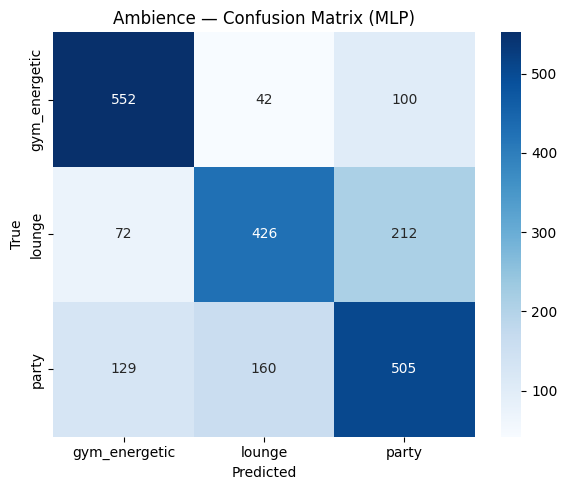


=== Task: Genre ===

>>> LogReg
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation AUC (macro): 0.808

>>> SVM-RBF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Validation AUC (macro): 0.872

>>> MLP
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Validation AUC (macro): 0.880

Best model for Genre: MLP (val AUC=0.880)
Test AUC (macro): 0.843

Classification report (test):
              precision    recall  f1-score   support

         edm       0.73      0.78      0.75       694
         pop       0.62      0.59      0.61       794
        rock       0.64      0.63      0.63       710

    accuracy                           0.66      2198
   macro avg       0.66      0.67      0.66      2198
weighted avg       0.66      0.66      0.66      2198



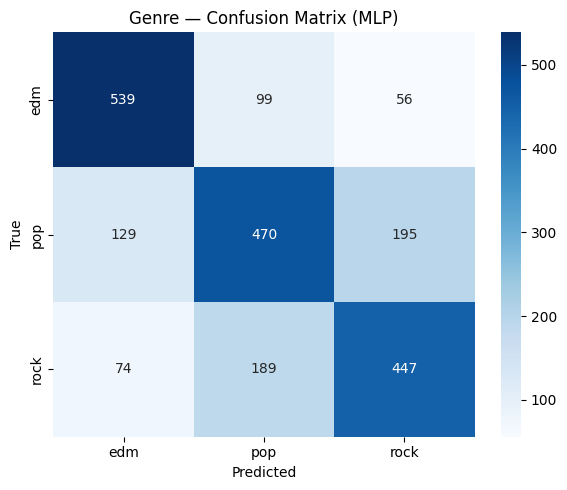

In [ ]:
results_amb, best_name_amb, best_model_amb, test_auc_amb = run_models_for_task(
    "Ambience",
    X_train, y_amb_train,
    X_val,   y_amb_val,
    X_test,  y_amb_test,
    le_amb
)

results_genre, best_name_genre, best_model_genre, test_auc_genre = run_models_for_task(
    "Genre",
    X_train, y_genre_train,
    X_val,   y_genre_val,
    X_test,  y_genre_test,
    le_genre
)
